## Laptop Price Prediction – Exploratory Data Analysis (EDA)

#### Understanding the key factors influencing laptop prices

##### A data-driven analysis of laptop pricing based on hardware specifications


In [19]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt 
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb

In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor

In [3]:
base_dir=os.path.dirname(os.getcwd())
path=os.path.join(base_dir, "data","raw", "laptop_price.csv")
df=pd.read_csv(path)

'''The dataset path is dynamically constructed using the os module to navigate
from the current working directory to the raw data folder, ensuring portability'''

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\Sandeep\\laptop-price-prediction\\data\\raw\\laptop_price.csv'

In [3]:
df = pd.read_csv(r"C:\Users\Sandeep\laptop-price-prediction\Dataset\laptop_price.csv")

In [18]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


### EDA – STEP 1: Dataset Overview 

In [6]:
df.shape

(1275, 15)

In [7]:
df.size

19125

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4), int64(1), object(10)
me

This step provides a high-level overview of the dataset, including the number of records, feature data types, and the presence of missing values. This helps in understanding the overall structure before performing deeper analysis.


### EDA- Step 2 : Target Variable Analysis

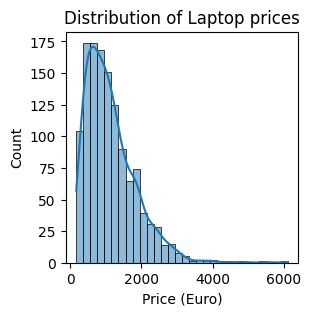

In [17]:
plt.figure(figsize=(3,3))
sns.histplot(df["Price (Euro)"],bins=30, kde=True)
plt.xlabel("Price (Euro)")    
plt.ylabel("Count")
plt.title("Distribution of Laptop prices")
plt.show()

This step analyzes the distribution of laptop prices to understand the range,
central tendency, and spread of the target variable. The distribution shows
the presence of lower-priced consumer laptops and a smaller number of high-end devices.


### EDA Step 3- Categorical Features Overview

In [19]:
df["Company"].value_counts()

Company
Dell         291
Lenovo       289
HP           268
Asus         152
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Vero           4
Xiaomi         4
Chuwi          3
Fujitsu        3
Google         3
LG             3
Huawei         2
Name: count, dtype: int64

In [20]:
df["TypeName"].value_counts()

TypeName
Notebook              707
Gaming                205
Ultrabook             194
2 in 1 Convertible    117
Workstation            29
Netbook                23
Name: count, dtype: int64

In [21]:
df["OpSys"].value_counts()

OpSys
Windows 10      1048
No OS             66
Linux             58
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

This step explores the distribution of key categorical features such as laptop brands,
form factors, and operating systems. Understanding their frequency helps identify
dominant categories and potential imbalance in the data.


### EDA-Step 4: Numerical Features Analysis

In [26]:
df[[ "Inches", "RAM (GB)","Weight (kg)"]].describe()

,Inches,RAM (GB),Weight (kg)
count,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525
std,1.429470,5.097809,0.669196
min,10.100000,2.000000,0.690000
25%,14.000000,4.000000,1.500000
50%,15.600000,8.000000,2.040000
75%,15.600000,8.000000,2.310000
max,18.400000,64.000000,4.700000


This step examines the distribution and spread of numerical features such as screen size, RAM, and weight to identify typical ranges and potential outliers

### EDA- Step 5: Complex /Text Columns Identification 

In [28]:
df[['ScreenResolution', 'Memory', 'CPU_Type', 'GPU_Type']].head()


,ScreenResolution,Memory,CPU_Type,GPU_Type
0,IPS Panel Retina Display 2560x1600,128GB SSD,Core i5,Iris Plus Graphics 640
1,1440x900,128GB Flash Storage,Core i5,HD Graphics 6000
2,Full HD 1920x1080,256GB SSD,Core i5 7200U,HD Graphics 620
3,IPS Panel Retina Display 2880x1800,512GB SSD,Core i7,Radeon Pro 455
4,IPS Panel Retina Display 2560x1600,256GB SSD,Core i5,Iris Plus Graphics 650


This step identifies text-heavy features such as screen resolution, memory configuration, and processor details that require feature extraction and transformation before model training.

## EDA Summary and Data Preparation Plan

Based on the exploratory data analysis, the dataset contains a mix of numerical,
categorical, and text-heavy features. Laptop price shows a right-skewed distribution,
with premium devices contributing to higher price values.

Numerical features such as screen size, RAM, and weight appear within reasonable ranges,
while categorical features show dominance of a few major brands and operating systems.
Text-based columns including screen resolution, memory configuration, and processor
details require feature extraction before model training.

### Data Preparation Plan
- Handle missing values where applicable
- Extract numerical information from screen resolution and memory columns
- Encode categorical variables using appropriate techniques
- Apply feature scaling where required
- Train and evaluate multiple regression models


In [21]:
df

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel,Core i7 6500U,2.5,4,128GB SSD,Intel,HD Graphics 520,Windows 10,1.80,638.00
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel,Core i7 6500U,2.5,16,512GB SSD,Intel,HD Graphics 520,Windows 10,1.30,1499.00
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel,Celeron Dual Core N3050,1.6,2,64GB Flash Storage,Intel,HD Graphics,Windows 10,1.50,229.00
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel,Core i7 6500U,2.5,6,1TB HDD,AMD,Radeon R5 M330,Windows 10,2.19,764.00


In [9]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution',
       'CPU_Company', 'CPU_Type', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Memory',
       'GPU_Company', 'GPU_Type', 'OpSys', 'Weight (kg)', 'Price (Euro)'],
      dtype='object')

In [4]:
# Isolate categorical columns
df_cat = df.select_dtypes(exclude=np.number)

# Label encoding all the categorical values
le = LabelEncoder()

for col in df_cat.columns:
    df["E_" + col] = le.fit_transform(df[col])


In [5]:
# Isolate numerical values
df_num = df.select_dtypes(include=np.number)

In [14]:
df_num.rename(columns = {"Price (Euro)":"Price"}, inplace = True)

In [16]:
# Data split
X = df_num.drop("Price", axis=1)
y = df_num["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

## Model Building and comparision

In [ ]:
# Using tree based modeling
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, random_state=42),
    "LightGBM": lgb.LGBMRegressor(n_estimators=100, random_state=42),
    "CatBoost": CatBoostRegressor(iterations=100, verbose=0, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000361 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 1020, number of used features: 14
[LightGBM] [Info] Start training from score 1139.172294


In [25]:
# Evaulation and report
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2
    })

results_df = pd.DataFrame(results)
print(results_df.sort_values(by="RMSE"))


               Model        RMSE         MAE        R2
4           LightGBM  261.178517  161.423051  0.842502
3            XGBoost  266.286257  165.885549  0.836281
5           CatBoost  267.335142  175.041841  0.834989
1      Random Forest  277.192171  177.375690  0.822596
2  Gradient Boosting  281.073093  187.996299  0.817594
0      Decision Tree  400.889187  233.074784  0.628935


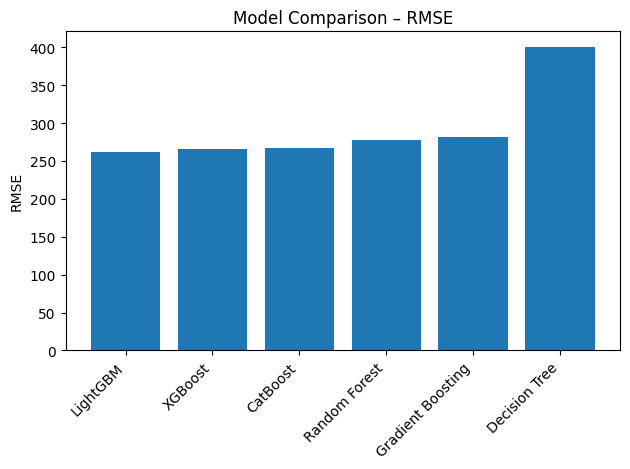

In [ ]:
# RMSE Comparision
import matplotlib.pyplot as plt

results_df_sorted = results_df.sort_values(by="RMSE")

plt.figure()
plt.bar(results_df_sorted["Model"], results_df_sorted["RMSE"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("RMSE")
plt.title("Model Comparison – RMSE")
plt.tight_layout()
plt.show()


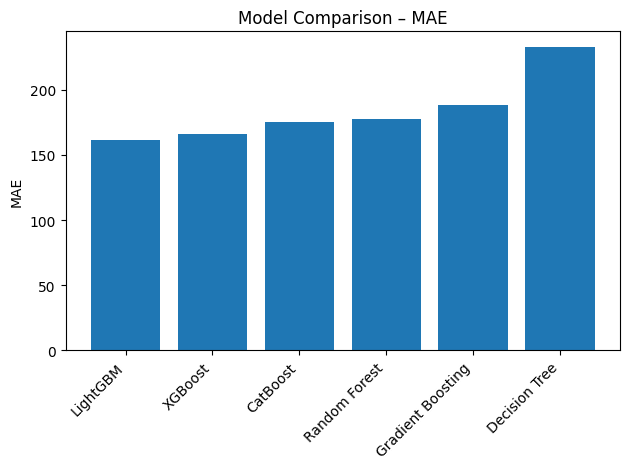

In [27]:
# MAE comparision
plt.figure()
plt.bar(results_df_sorted["Model"], results_df_sorted["MAE"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("MAE")
plt.title("Model Comparison – MAE")
plt.tight_layout()
plt.show()


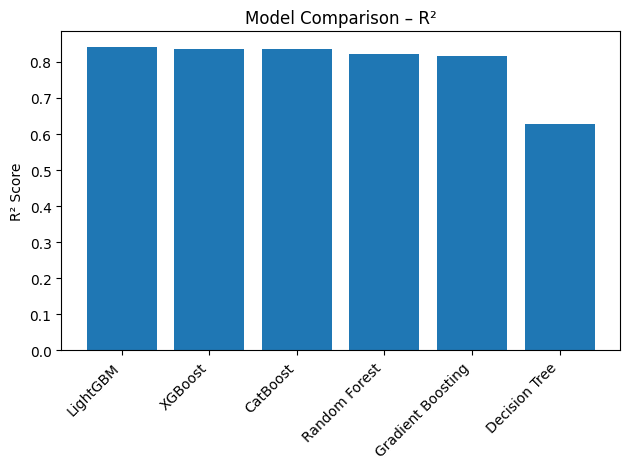

In [28]:
# R Square comparision
plt.figure()
plt.bar(results_df_sorted["Model"], results_df_sorted["R2"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("R² Score")
plt.title("Model Comparison – R²")
plt.tight_layout()
plt.show()

## Next to do
## 1) with the best model get the best parameters via grid search
## 2) 